## **Set up and Loading of Data**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
files=files.upload()
df=pd.read_csv('Pokemon.csv')

Saving Pokemon.csv to Pokemon.csv


## **Data Inspection**

In [ ]:
print("database shape",df.shape) # Check how many rows and columns are in the dataset
print("first rows", df.head()) # Returns the first few rows of data
print("Column names",df.columns.tolist()) # Gives all the names of the columns

database shape (800, 9)
first rows   Type 1  HP  Attack  Defense  Sp. Attack  Sp. Defense  Speed  Generation  \
0  Grass  45      49       49          65           65     45           1   
1  Grass  60      62       63          80           80     60           1   
2  Grass  80      82       83         100          100     80           1   
3  Grass  80     100      123         122          120     80           1   
4   Fire  39      52       43          60           50     65           1   

   Legendary  
0          0  
1          0  
2          0  
3          0  
4          0  
Column names ['Type 1', 'HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed', 'Generation', 'Legendary']


## **Data cleaning**

In [ ]:
# Check for missing values
print("Missing values:",df.isnull().sum())


# Check for duplicates
print(f"\nNumber of rows duplicated: {df.duplicated().sum()}")

# Drop duplicates
df.drop_duplicates(inplace=True)
print("Data cleaning is completed")

Missing values: Type 1         0
HP             0
Attack         0
Defense        0
Sp. Attack     0
Sp. Defense    0
Speed          0
Generation     0
Legendary      0
dtype: int64

Number of rows duplicated: 7
Data cleaning is completed


## **First Insight (Bar Graph of pokemon types)**

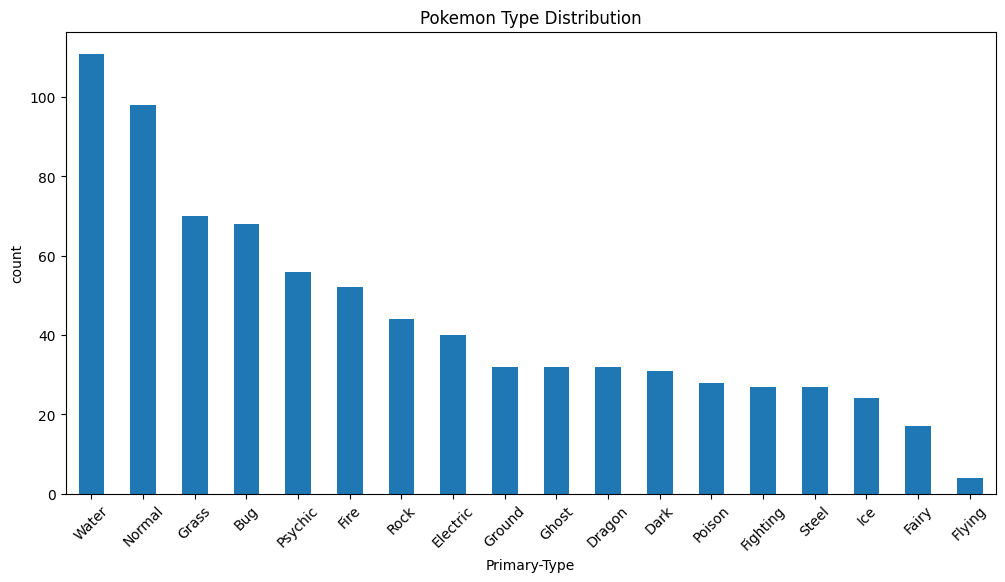

In [ ]:

plt.figure(figsize=(12,6)) # Set the figure size

## Counting and plotting the type of Pokemon via a bar graph
df['Type 1'].value_counts().plot(kind='bar')
plt.title('Pokemon Type Distribution')
plt.xlabel('Primary-Type')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

## **Second Insight (Pie chart of proportions of Legendary vs Regular Pokemon)**

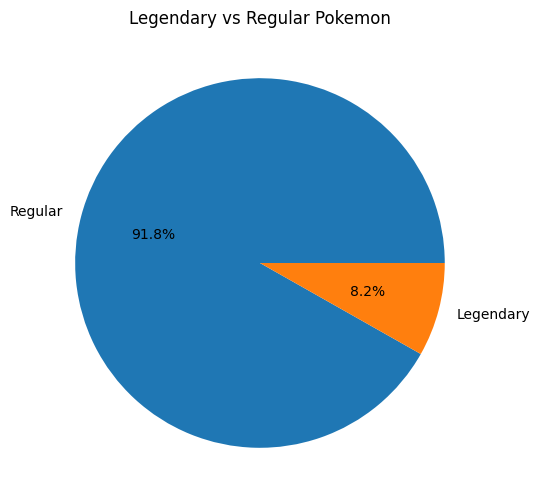

In [ ]:
## Setting up the size of the plot
plt.figure(figsize=(8,6))

## Counting and plotting the proportion of legendary vs normal pokemon using a pie chart
df['Legendary'].value_counts().plot(kind='pie',autopct='%1.1f%%', labels=['Regular','Legendary'])
plt.title('Legendary vs Regular Pokemon')
plt.ylabel('')
plt.show()


## **Third Insight (Line plot of the average stats across the generations)**

Text(0, 0.5, 'Average Stats')

<Figure size 1000x600 with 0 Axes>

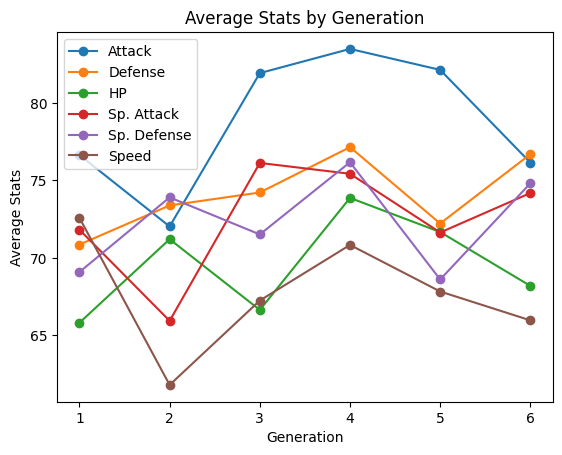

In [ ]:
# Calculate the average of stats grouped by the generation
plt.figure(figsize=(10,6))
stats_by_gen=df.groupby('Generation')[['Attack','Defense','HP','Sp. Attack','Sp. Defense','Speed']].mean()

# Plot the means as lines to show trends across the generations
stats_by_gen.plot(kind='line', marker='o')
plt.title('Average Stats by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Stats')

## **Fourth Insights (Scatter plot for the relationship between attack and defense)**

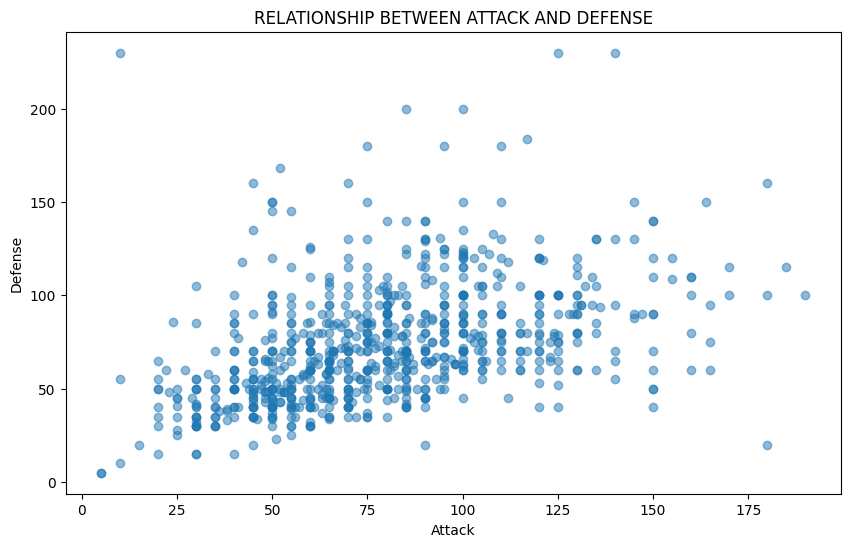

In [ ]:
# Setting the plot size
plt.figure(figsize=(10,6))

# Create a scatter plot to show the relationship between attack and defense
plt.scatter(df['Attack'],df['Defense'], alpha=0.5)
plt.title('Attack vs Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title("RELATIONSHIP BETWEEN ATTACK AND DEFENSE")
plt.show()

## **Feature Selection via Correlation Matrix**

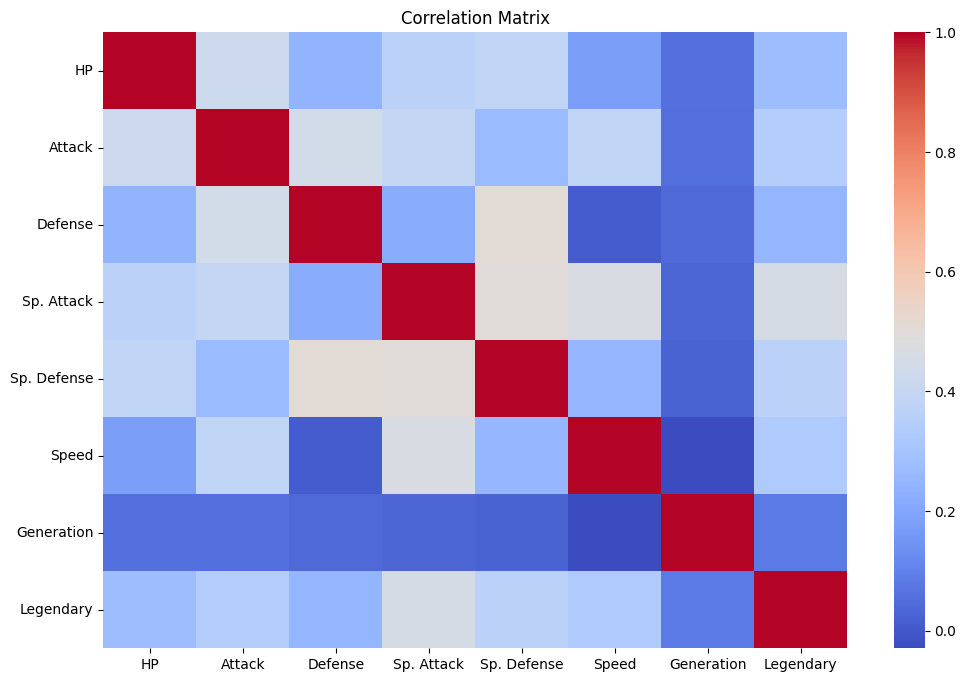

Pearson correlations with target:
 Legendary      1.000000
Sp. Attack     0.453354
Sp. Defense    0.367961
Attack         0.344716
Speed          0.329750
HP             0.273319
Defense        0.248872
Generation     0.081568
Name: Legendary, dtype: float64


In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Compute Pearson correlation of each numeric feature with the target
target_corr = corr_matrix['Legendary'].abs().sort_values(ascending=False)

print("Pearson correlations with target:\n", target_corr)

# Select features having correlation equal to or greater than 0.20
selected_features = target_corr[target_corr >= 0.20].index.tolist()

# Ensure the target column is excluded
selected_features = [f for f in selected_features if f != 'Legendary']

## Best features are the ones with the closer values to the target (1)



## **Basic Random Forest Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features (x) and target (y)
x = df[['Sp. Attack', 'Sp. Defense']]
y = df['Legendary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

# Create an untuned Random Forest classifier (Eager Learner)
# n_estimators=100 means it builds 100 decision trees
rf_model_basic = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model_basic.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_rf_basic = rf_model_basic.predict(X_test)
rf_basic_accuracy = accuracy_score(y_test, y_pred_rf_basic)
print(f"Basic Random Forest Accuracy: {rf_basic_accuracy:.3f}")

print("Basic Random Forest model completed")

Basic Random Forest Accuracy: 0.921
Basic Random Forest model completed


## **K-NN Classifier**

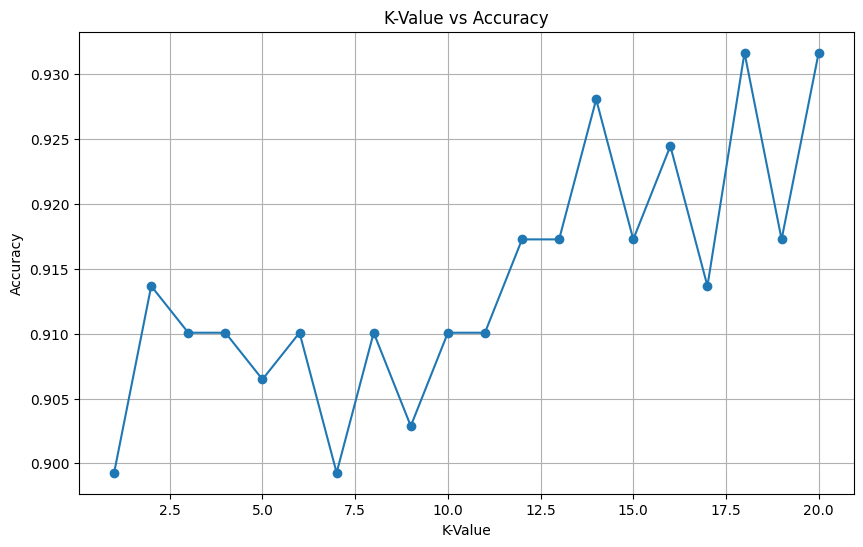

Optional K: 18 with accuracy: 0.932
k-NN model completed


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find optimal k value (Number of neighbours)
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    ## Test accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot k vs accuracy to visualise what the best k is
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('K-Value vs Accuracy')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find best k (the one with the highest accuracy)
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Optional K: {best_k} with accuracy: {best_accuracy:.3f}")

# Train final k-NN model with  optimal k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print("k-NN model completed")

## **Tuned Random Forest Classifier**

In [ ]:
# Create a Tuned Random Forest with controlled parameter
tuned_rf_model = RandomForestClassifier(
    n_estimators=200,     # Increased number of trees
    max_depth=5,          # Limit depth to reduce overfitting
    min_samples_leaf=5,   # Minimum samples required at leaf node
    random_state=42,
    n_jobs=-1
)

# Train the tuned model
tuned_rf_model.fit(X_train, y_train)
y_pred_tuned_rf = tuned_rf_model.predict(X_test)

tuned_rf_accuracy = accuracy_score(y_test, y_pred_tuned_rf)
print(f"Tuned Random Forest Accuracy: {tuned_rf_accuracy:.3f}")

print("Tuned Random Forest model is completed")

Tuned Random Forest Accuracy: 0.942
Tuned Random Forest model is completed


## **Final evaluation and comparison**

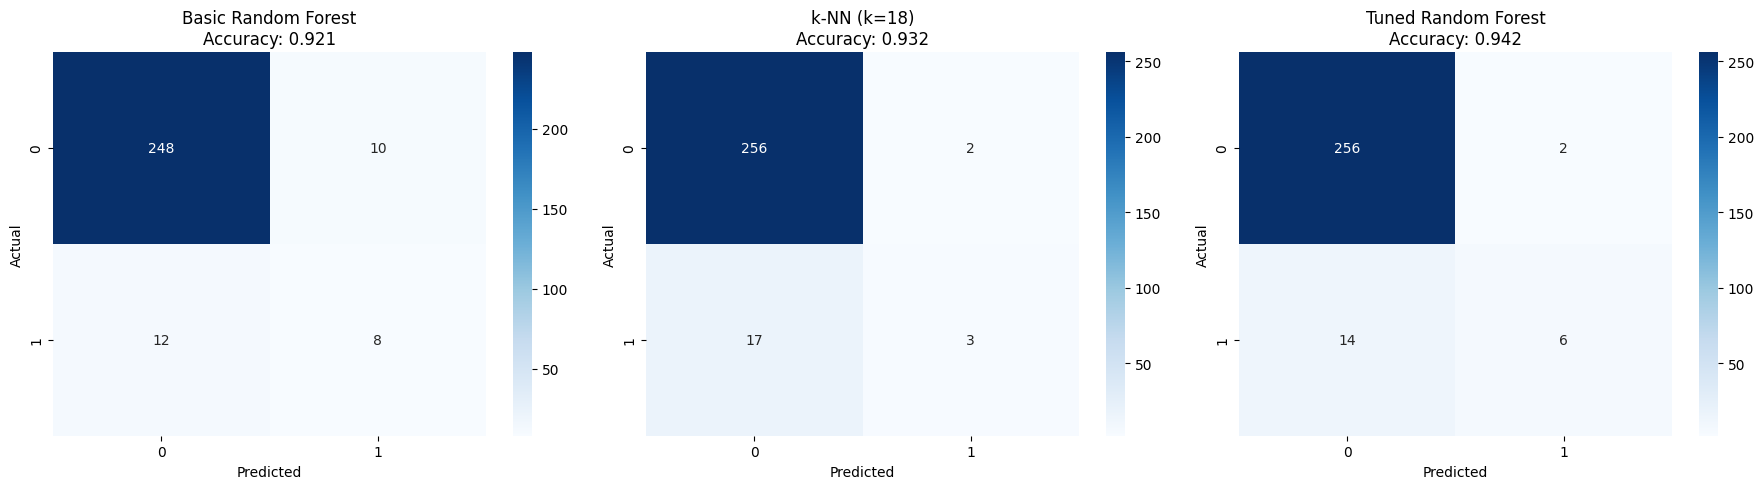


Model Summary:
Basic Random Forest: 0.921
k-NN Classifier (k=18): 0.932
Tuned Random Forest: 0.942

Best performing model: Tuned RF


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Confusion Matrices for all three models
cm_rf_basic = confusion_matrix(y_test, y_pred_rf_basic)
cm_knn = confusion_matrix(y_test, y_pred)
cm_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)

# Plot the three confusion matrices side-by-side
fig, axes = plt.subplots(1,3, figsize=(18,5))

# Plot Basic Random Forest Confusion Matrix
sns.heatmap(cm_rf_basic, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title(f'Basic Random Forest\nAccuracy: {rf_basic_accuracy:.3f}')
axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('Actual')

# k-NN Confusion Matrix
sns.heatmap(cm_knn, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title(f'k-NN (k={best_k})\nAccuracy: {best_accuracy:.3f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Plot Tuned Random Forest Confusion Matrix
sns.heatmap(cm_tuned_rf, annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title(f'Tuned Random Forest\nAccuracy: {tuned_rf_accuracy:.3f}')
axes[2].set_xlabel('Predicted'); axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print and compare final accuracies to determine the best model
models = {
    'Basic RF': rf_basic_accuracy,
    'K-nn': best_accuracy,
    'Tuned RF': tuned_rf_accuracy
}
best_model = max(models, key=models.get)
print("\nModel Summary:")
print(f"Basic Random Forest: {rf_basic_accuracy:.3f}")
print(f"k-NN Classifier (k={best_k}): {best_accuracy:.3f}")
print(f"Tuned Random Forest: {tuned_rf_accuracy:.3f}")
print(f"\nBest performing model: {best_model}")

## **Group Photo**

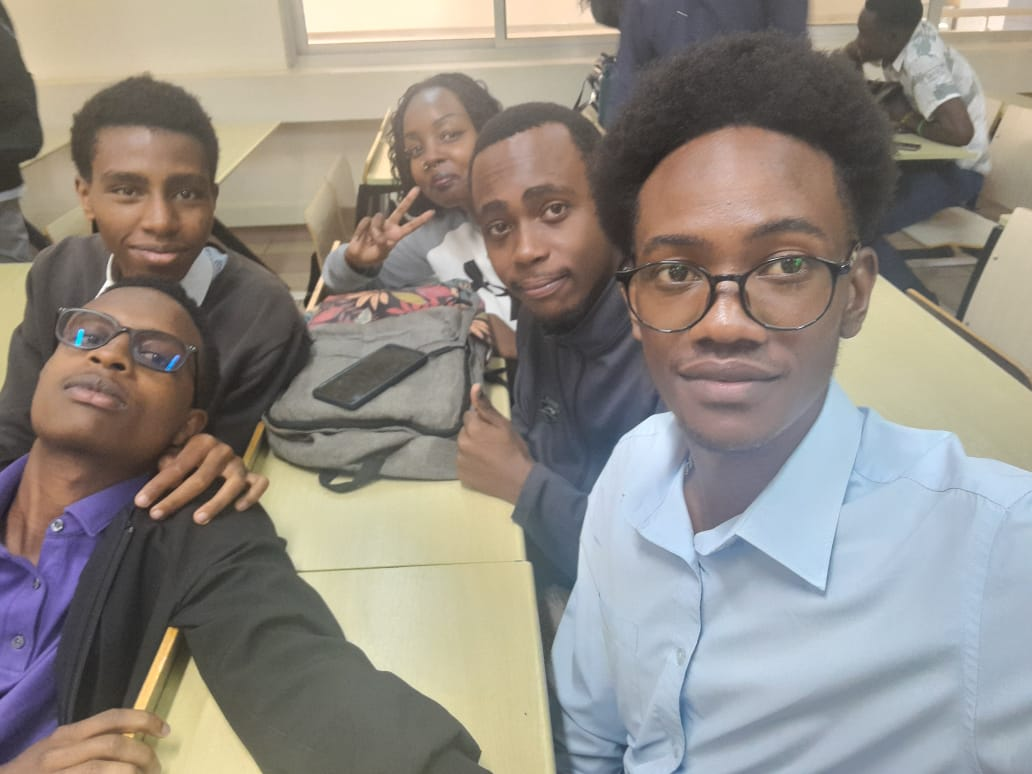